## Deep Neural Network for Image Classification: Application

### 1. Packages

In [3]:
import warnings 
warnings.filterwarnings('ignore')
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%reload_ext autoreload
%autoreload 2

np.random.seed(1)

### 2. Datasets

In [5]:
train_x_org, train_y, test_x_org, test_y, classes = load_data()

y :  0 It's a:  non-cat


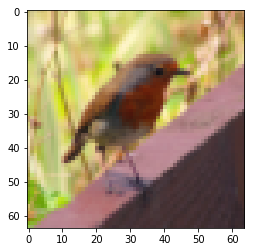

In [6]:
#example of a picture
index = 10
plt.imshow(train_x_org[index])
print("y : ", train_y[0,index], "It's a: ", classes[train_y[0,index]].decode("utf-8"))

In [7]:
#explore the dataset
m_train = train_x_org.shape[0]
num_px = train_x_org.shape[1]
m_test = test_x_org.shape[0]

print("Number of training examples : ", m_train)
print("Number of testing examples : ", m_test)
print("Size of image : ", num_px,num_px,"3")
print("train_x_org shape : ", train_x_org.shape)
print("train_y shape : ", train_y.shape)
print("test_x_org shape : ", test_x_org.shape)
print("test_y shape : ", test_y.shape)

Number of training examples :  209
Number of testing examples :  50
Size of image :  64 64 3
train_x_org shape :  (209, 64, 64, 3)
train_y shape :  (1, 209)
test_x_org shape :  (50, 64, 64, 3)
test_y shape :  (1, 50)


In [8]:
#reshape the training and testing examples
train_x_flatten = train_x_org.reshape(train_x_org.shape[0],-1).T
test_x_flatten = test_x_org.reshape(test_x_org.shape[0],-1).T

#standardize data to have feature value between 0 and 1
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print("train_x shape : ", train_x.shape)
print("test_x shape : ", test_x.shape)

train_x shape :  (12288, 209)
test_x shape :  (12288, 50)


### 3. Architecture of the model
We will build two differrent models:
- 2 layer neural network
- L-layer deep neural network

#### 3.1 2 layer network

In [9]:
#initialize the dims
n_x = 12288
n_h = 7
n_y = 1
layer_dims = (n_x, n_h, n_y)

In [19]:
def two_layer_model(X, Y, layer_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layer_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        
        #forward pass
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        
        #compute cost
        cost = compute_cost(A2, Y)
        
        #initialize the backward propagation
        dA2 = -(np.divide(Y,A2) - np.divide(1-Y, 1-A2))
        
        #backward propagation
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        #set the gradients
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2
        
        #update the parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        #extract the weights and biases
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        #print the cost
        if print_cost  and i%200==0:
            print("Cost after %d iterations = %.3f"%(i,np.squeeze(cost)))
            costs.append(cost)
            
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations per tens')
    plt.title('Learning rate '+str(learning_rate))
    plt.show()
    
    return parameters
        

Cost after 0 iterations = 0.693
Cost after 200 iterations = 0.633
Cost after 400 iterations = 0.560
Cost after 600 iterations = 0.475
Cost after 800 iterations = 0.401
Cost after 1000 iterations = 0.339
Cost after 1200 iterations = 0.275
Cost after 1400 iterations = 0.199
Cost after 1600 iterations = 0.171
Cost after 1800 iterations = 0.096
Cost after 2000 iterations = 0.074
Cost after 2200 iterations = 0.059
Cost after 2400 iterations = 0.049


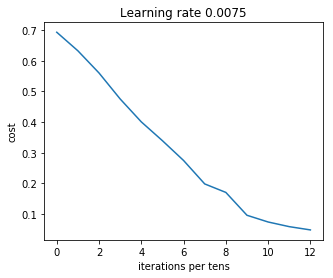

In [20]:
parameters = two_layer_model(train_x, train_y, layer_dims=(n_x, n_h, n_y), 
                             num_iterations=2500, print_cost=True)

In [21]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [22]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


#### 3.2 L-layered Network

In [23]:
layer_dims = [12288, 20, 7, 5, 1] 

In [24]:
def L_layer_model(X, Y, layer_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layer_dims)
    
    for i in range(0, num_iterations):
        #forward propagation
        AL, caches = L_model_forward(X, parameters)
        
        #compute the cost
        cost = compute_cost(AL, Y)
        
        #backward propagation
        grads = L_model_backward(AL, Y, caches)
        
        #update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i%200==0:
            print("Cost after %d iterations : %.3f"%(i, cost))
            costs.append(cost)
    
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations per tens')
    plt.title('Learning rate '+str(learning_rate))
    plt.show()
    
    return parameters 
    

Cost after 0 iterations : 0.772
Cost after 200 iterations : 0.648
Cost after 400 iterations : 0.567
Cost after 600 iterations : 0.528
Cost after 800 iterations : 0.369
Cost after 1000 iterations : 0.315
Cost after 1200 iterations : 0.237
Cost after 1400 iterations : 0.189
Cost after 1600 iterations : 0.148
Cost after 1800 iterations : 0.130
Cost after 2000 iterations : 0.114
Cost after 2200 iterations : 0.103
Cost after 2400 iterations : 0.093


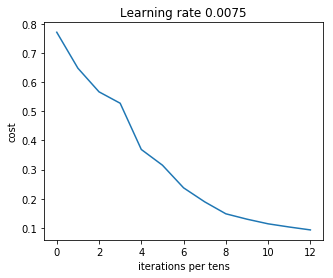

In [25]:
parameters = L_layer_model(train_x, train_y, layer_dims, num_iterations=2500, print_cost=True)

In [26]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [27]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


### 4. Result Analysis

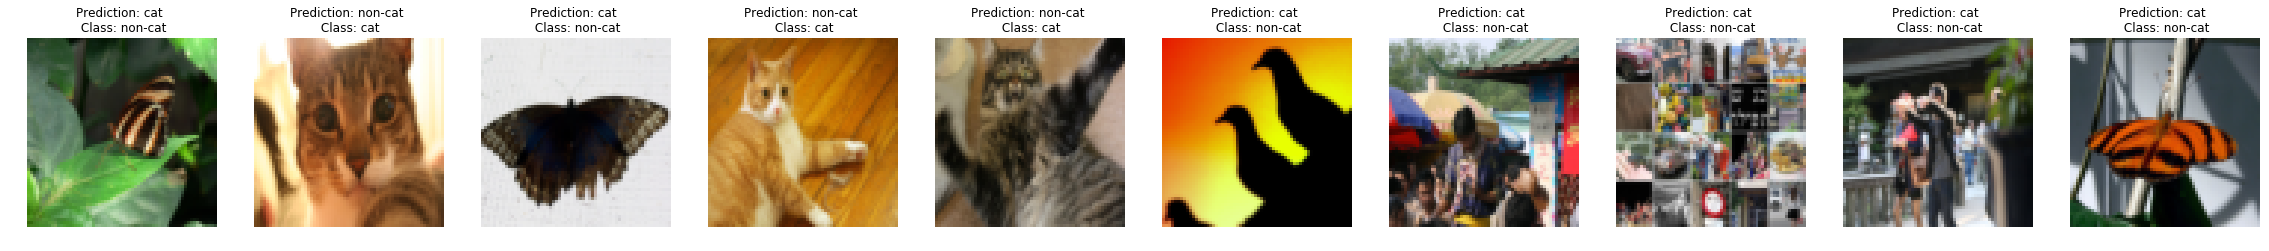

In [30]:
print_mislabeled_images(classes, test_x, test_y, pred_test)